# Notebook to compute mass limits #

In [1]:
from astropy.table import Table
from matplotlib import pyplot as plt
%matplotlib inline
import os
import numpy as np

import warnings
warnings.filterwarnings('ignore')

mycolors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [2]:
homedir = os.getenv("HOME")
#tabledir = homedir+'/Work/Virgo_outskirts/Catalogs/vf-tables/v2/2022-08-20/'
tabledir = homedir + '/Work/Virgo_outskirts/Catalogs/vf-tables/v2/2023-07-12/'
plotdir = homedir+'/Work/Virgo_outskirts/Plots/'
#tabledir = homedir+'/research/Virgo/tables-north/v2/2022-08-20/'
#plotdir = homedir+'/research/Virgo/plots/'

In [3]:
%run ~/Work/Virgo_outskirts/Rfinn_github/Virgo/programs/readtablesv2.py  --tabledir $tabledir
#%run ~/github/Virgo/programs/readtablesv2.py --tabledir $tabledir

In [4]:
v.ephot.colnames

['VFID',
 'photFlag',
 'SGA_ID',
 'VF_ID',
 'GALAXY',
 'X0_MOMENT',
 'Y0_MOMENT',
 'RA_MOMENT',
 'DEC_MOMENT',
 'SMA_MOMENT',
 'PA_MOMENT',
 'BA_MOMENT',
 'SMA_FUV',
 'INTENS_FUV',
 'INTENS_ERR_FUV',
 'EPS_FUV',
 'EPS_ERR_FUV',
 'PA_FUV',
 'PA_ERR_FUV',
 'X0_FUV',
 'X0_ERR_FUV',
 'Y0_FUV',
 'Y0_ERR_FUV',
 'A3_FUV',
 'A3_ERR_FUV',
 'A4_FUV',
 'A4_ERR_FUV',
 'RMS_FUV',
 'PIX_STDDEV_FUV',
 'STOP_CODE_FUV',
 'NDATA_FUV',
 'NFLAG_FUV',
 'NITER_FUV',
 'SMA_NUV',
 'INTENS_NUV',
 'INTENS_ERR_NUV',
 'EPS_NUV',
 'EPS_ERR_NUV',
 'PA_NUV',
 'PA_ERR_NUV',
 'X0_NUV',
 'X0_ERR_NUV',
 'Y0_NUV',
 'Y0_ERR_NUV',
 'A3_NUV',
 'A3_ERR_NUV',
 'A4_NUV',
 'A4_ERR_NUV',
 'RMS_NUV',
 'PIX_STDDEV_NUV',
 'STOP_CODE_NUV',
 'NDATA_NUV',
 'NFLAG_NUV',
 'NITER_NUV',
 'SMA_SB22',
 'SMA_SB22.5',
 'SMA_SB23',
 'SMA_SB23.5',
 'SMA_SB24',
 'SMA_SB24.5',
 'SMA_SB25',
 'SMA_SB25.5',
 'SMA_SB26',
 'SMA_IVAR_SB22',
 'SMA_IVAR_SB22.5',
 'SMA_IVAR_SB23',
 'SMA_IVAR_SB23.5',
 'SMA_IVAR_SB24',
 'SMA_IVAR_SB24.5',
 'SMA_IVAR_SB25',

plot histogram of r-band magnitudes

In [5]:
v.dr9.colnames

['VFID',
 'RELEASE',
 'BRICKID',
 'BRICKNAME',
 'OBJID',
 'TYPE',
 'RA',
 'DEC',
 'RA_IVAR',
 'DEC_IVAR',
 'DCHISQ',
 'EBV',
 'FLUX_G',
 'FLUX_R',
 'FLUX_Z',
 'FLUX_W1',
 'FLUX_W2',
 'FLUX_W3',
 'FLUX_W4',
 'FLUX_IVAR_G',
 'FLUX_IVAR_R',
 'FLUX_IVAR_Z',
 'FLUX_IVAR_W1',
 'FLUX_IVAR_W2',
 'FLUX_IVAR_W3',
 'FLUX_IVAR_W4',
 'MW_TRANSMISSION_G',
 'MW_TRANSMISSION_R',
 'MW_TRANSMISSION_Z',
 'MW_TRANSMISSION_W1',
 'MW_TRANSMISSION_W2',
 'MW_TRANSMISSION_W3',
 'MW_TRANSMISSION_W4',
 'NOBS_G',
 'NOBS_R',
 'NOBS_Z',
 'NOBS_W1',
 'NOBS_W2',
 'NOBS_W3',
 'NOBS_W4',
 'RCHISQ_G',
 'RCHISQ_R',
 'RCHISQ_Z',
 'RCHISQ_W1',
 'RCHISQ_W2',
 'RCHISQ_W3',
 'RCHISQ_W4',
 'FRACFLUX_G',
 'FRACFLUX_R',
 'FRACFLUX_Z',
 'FRACFLUX_W1',
 'FRACFLUX_W2',
 'FRACFLUX_W3',
 'FRACFLUX_W4',
 'FRACMASKED_G',
 'FRACMASKED_R',
 'FRACMASKED_Z',
 'FRACIN_G',
 'FRACIN_R',
 'FRACIN_Z',
 'ANYMASK_G',
 'ANYMASK_R',
 'ANYMASK_Z',
 'ALLMASK_G',
 'ALLMASK_R',
 'ALLMASK_Z',
 'WISEMASK_W1',
 'WISEMASK_W2',
 'PSFSIZE_G',
 'PSFSIZE_R',
 

6755


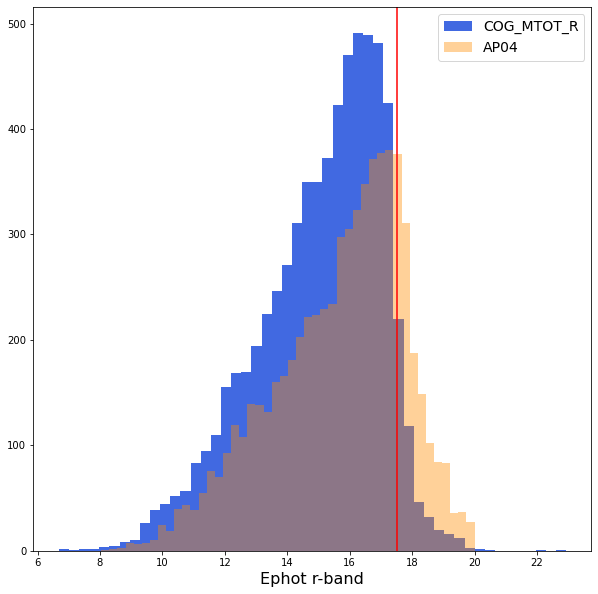

In [6]:
plt.figure(figsize=(10,10))
flag = (v.ephot['COG_MTOT_R']>1) #& (v.dr9['MASKBITS']==0) & (v.dr9['FITBITS']==0)
plt.hist(v.ephot['COG_MTOT_R'][flag],bins=50, label='COG_MTOT_R',color='royalblue')

mag = 22.5 - 2.5 * np.log10(v.ephot['FLUX_AP04_R'])
flag = (mag>1) #& (v.dr9['MASKBITS']==0) & (v.dr9['FITBITS']==0)
plt.hist(mag[flag],bins=50,range=(7,20), color='darkorange', alpha=0.4,label='AP04')

plt.legend(fontsize=14)
plt.xlabel('Ephot r-band',fontsize=16)
plt.axvline(x=17.5,color='red')
print(sum(flag))

1118


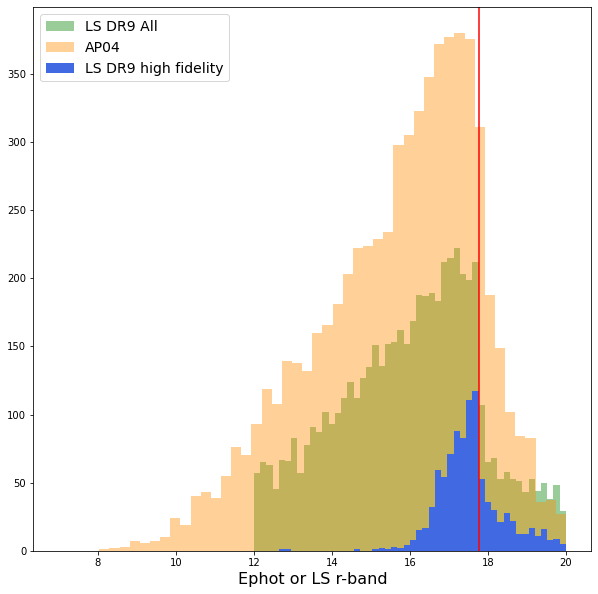

In [11]:
plt.figure(figsize=(10,10))

flag = (v.dr9['r']>1) #& (v.dr9['MASKBITS']==0) & (v.dr9['FITBITS']==0)
plt.hist(v.dr9['r'][flag],bins=50,range=(12,20),color='green',alpha=0.4,label='LS DR9 All')

mag = 22.5 - 2.5 * np.log10(v.ephot['FLUX_AP04_R'])
flag = (mag>1) #& (v.dr9['MASKBITS']==0) & (v.dr9['FITBITS']==0)
plt.hist(mag[flag],bins=50,range=(7,20), color='darkorange', alpha=0.4,label='AP04')

flag = (v.dr9['r']>1) & (v.dr9['MASKBITS']==0) & (v.dr9['FITBITS']==0)
plt.hist(v.dr9['r'][flag],bins=50,range=(12,20),color='royalblue',label='LS DR9 high fidelity')

plt.xlabel('Ephot or LS r-band',fontsize=16)
plt.legend(fontsize=14)
plt.axvline(x=17.77,color='red')
print(sum(flag))

6755


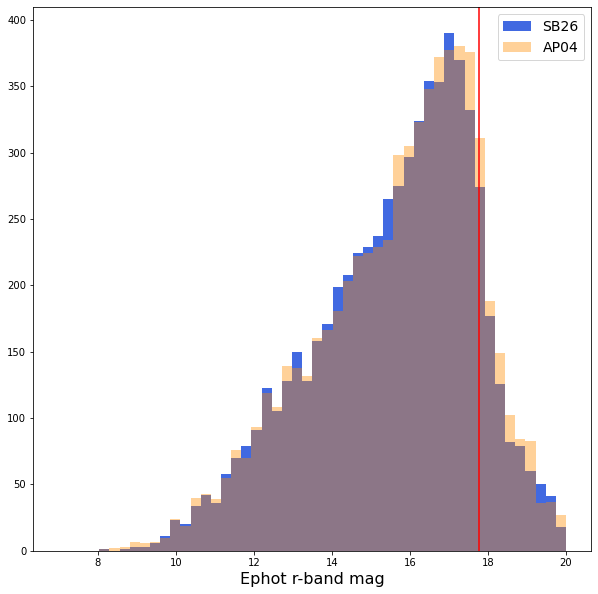

In [8]:
plt.figure(figsize=(10,10))
mag = 22.5 - 2.5 * np.log10(v.ephot['FLUX_SB26_R'])
flag = (mag>1) #& (v.dr9['MASKBITS']==0) & (v.dr9['FITBITS']==0)
plt.hist(mag[flag],bins=50,range=(7,20), color='royalblue', label='SB26')

mag = 22.5 - 2.5 * np.log10(v.ephot['FLUX_AP04_R'])
flag = (mag>1) #& (v.dr9['MASKBITS']==0) & (v.dr9['FITBITS']==0)
plt.hist(mag[flag],bins=50,range=(7,20), color='darkorange', alpha=0.4,label='AP04')

plt.xlabel('Ephot r-band mag',fontsize=16)
plt.axvline(x=17.77,color='red')
plt.legend(fontsize=14)

print(sum(flag))

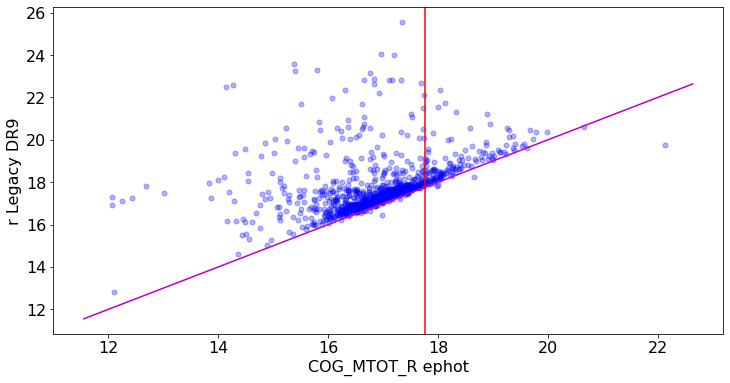

In [12]:
plt.figure(figsize=(12,6))
#v.dr9
flag = (v.ephot['COG_MTOT_R']>1) & (v.dr9['MASKBITS']==0) & (v.dr9['FITBITS']==0)

plt.plot(v.ephot['COG_MTOT_R'][flag],v.dr9['r'][flag],'b.',alpha=0.3,markersize=10)
xmin,xmax = plt.xlim()
plt.plot([xmin,xmax],[xmin,xmax],'m-')
plt.xlabel('COG_MTOT_R ephot',fontsize=16)
plt.ylabel('r Legacy DR9',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axvline(x=17.77,color='red')

0.30260944


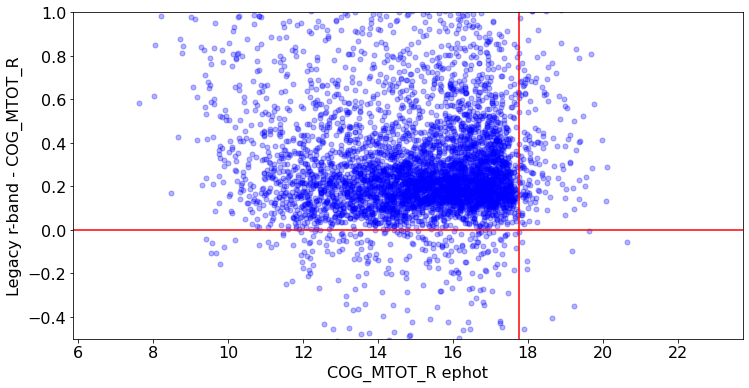

In [14]:
plt.figure(figsize=(12,6))
#v.dr9
flag = (v.ephot['COG_MTOT_R']>1) #& (v.dr9['MASKBITS']==0) & (v.dr9['FITBITS']==0)
magdiff = v.dr9['r'] - v.ephot['COG_MTOT_R']
plt.plot(v.ephot['COG_MTOT_R'][flag],magdiff[flag],'b.',alpha=0.3,markersize=10)
plt.ylim(-0.5,1)
flag = (v.ephot['COG_MTOT_R']>1) #& (v.dr9['MASKBITS']==0) & (v.dr9['FITBITS']==0) & (magdiff>0.7)
#plt.plot(v.ephot['COG_MTOT_R'][flag],magdiff[flag],'g.',alpha=0.3,markersize=10)
print(np.nanmedian(magdiff[flag]))

xmin,xmax = plt.xlim()
plt.xlabel('COG_MTOT_R ephot',fontsize=16)
plt.ylabel('Legacy r-band - COG_MTOT_R',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axvline(x=17.77,color='red')
plt.axhline(y=0,color='red')
plt.savefig(plotdir+'magdiff.png',overwrite=True)

#print galaxies with big magnitude differences in a format suitable for legacy survey view
newtab = Table([v.main['RA'][flag],v.main['DEC'][flag],v.main['VFID'][flag]])
newtab.write(plotdir+'magdiff_table.fits',format='fits',overwrite=True)

In [15]:
-2.5 * np.log10(0.3)

1.307196863200844

5.161048


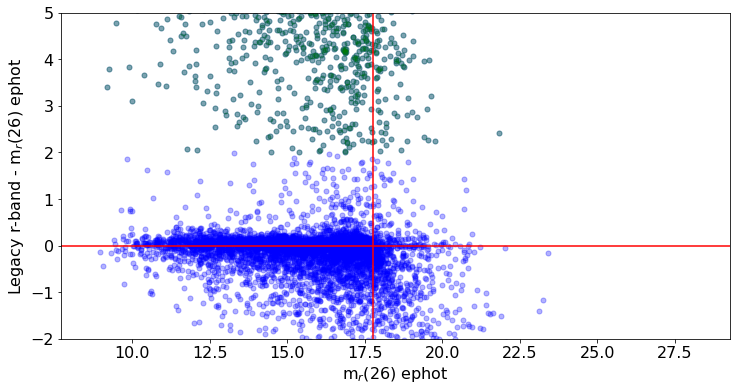

In [17]:
plt.figure(figsize=(12,6))
#v.dr9
mag = 22.5 - 2.5 * np.log10(v.ephot['FLUX_SB26_R'])
flag = (mag>1) #& (v.dr9['MASKBITS']==0) & (v.dr9['FITBITS']==0)
magdiff = v.dr9['r'] - mag
plt.plot(mag[flag],magdiff[flag],'b.',alpha=0.3,markersize=10)
plt.ylim(-2,5)
flag = (mag>1) & (magdiff>2.0)#& (v.dr9['MASKBITS']==0) & (v.dr9['FITBITS']==0) 
plt.plot(mag[flag],magdiff[flag],'g.',alpha=0.3,markersize=10)
print(np.nanmedian(magdiff[flag]))
xmin,xmax = plt.xlim()
plt.xlabel(r'm$_r$(26) ephot',fontsize=16)
plt.ylabel(r'Legacy r-band - m$_r$(26) ephot',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axvline(x=17.77,color='red')
plt.axhline(y=0,color='red')
plt.savefig(plotdir+'magdiff_sb26.png',overwrite=True)

#print galaxies with big magnitude differences in a format suitable for legacy survey view
newtab = Table([v.main['RA'][flag],v.main['DEC'][flag],v.main['VFID'][flag]])
newtab.write(plotdir+'magdiff_sb26_table.fits',format='fits',overwrite=True)

5.1774445


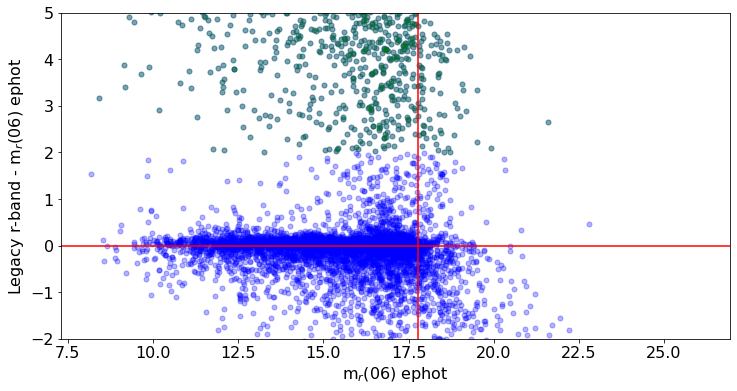

In [20]:
plt.figure(figsize=(12,6))
#v.dr9
mag = 22.5 - 2.5 * np.log10(v.ephot['FLUX_AP06_R'])

flag = (mag>1) #& (v.dr9['MASKBITS']==0) & (v.dr9['FITBITS']==0)
magdiff = v.dr9['r'] - mag
plt.plot(mag[flag],magdiff[flag],'b.',alpha=0.3,markersize=10)
plt.ylim(-2,5)

flag = (mag>1) & (magdiff>2.0)#& (v.dr9['MASKBITS']==0) & (v.dr9['FITBITS']==0) 
plt.plot(mag[flag],magdiff[flag],'g.',alpha=0.3,markersize=10)
print(np.nanmedian(magdiff[flag]))
xmin,xmax = plt.xlim()
plt.xlabel(r'm$_r$(06) ephot',fontsize=16)
plt.ylabel(r'Legacy r-band - m$_r$(06) ephot',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axvline(x=17.77,color='red')
plt.axhline(y=0,color='red')
plt.savefig(plotdir+'magdiff_ap06.png',overwrite=True)

#print galaxies with big magnitude differences in a format suitable for legacy survey view
newtab = Table([v.main['RA'][flag],v.main['DEC'][flag],v.main['VFID'][flag]])
newtab.write(plotdir+'magdiff_ap06_table.fits',format='fits',overwrite=True)

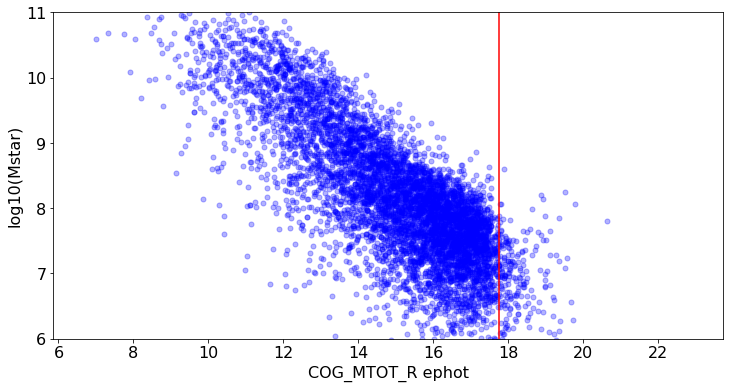

In [21]:
plt.figure(figsize=(12,6))
#v.dr9
flag = (v.ephot['COG_MTOT_R']>1) 
plt.plot(v.ephot['COG_MTOT_R'][flag],v.magphys['logMstar'][flag],'b.',alpha=0.3,markersize=10)
plt.ylim(6,11)
xmin,xmax = plt.xlim()
plt.xlabel('COG_MTOT_R ephot',fontsize=16)
plt.ylabel('log10(Mstar)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axvline(x=17.77,color='red')
plt.axhline(y=0,color='red')

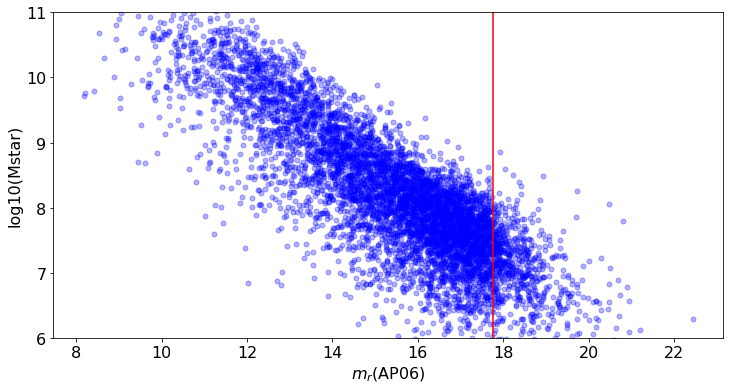

In [22]:
plt.figure(figsize=(12,6))
#v.dr9
mag = 22.5 - 2.5 * np.log10(v.ephot['FLUX_AP06_R'])
flag = (v.ephot['FLUX_AP06_R']>1) 
plt.plot(mag[flag],v.magphys['logMstar'][flag],'b.',alpha=0.3,markersize=10)
plt.ylim(6,11)
xmin,xmax = plt.xlim()
plt.xlabel(r'$m_r$(AP06)',fontsize=16)
plt.ylabel('log10(Mstar)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.axvline(x=17.77,color='red')
plt.axhline(y=0,color='red')

In [23]:
#v.magphys.colnames

-0.8616905
6780 total number of sources
210 number of sources for M/L calculation


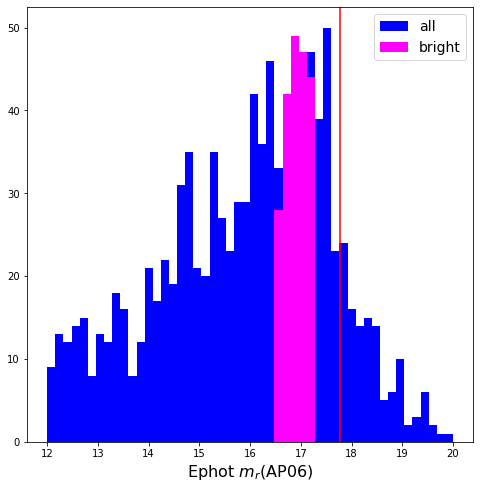

In [24]:
'''

select galaxies that are within 1 mag of the magnitude limit

compute the scaling needed to move galaxies to magnitude limit

apply the scaling to the flux and to the stellar mass (logMstar-med)

plot the distribution of M/L

Take the 95% limit of M/L

Apply this to the magnitude limit to get the stellar mass limit


'''

#use legacy survey magnitudes
maglim_r = 17.77    #SDSS spectroscopic limit
#maglim_r = 17.5    #SDSS spectroscopic limit

#select galaxies between 0.5 and 1 mag brighter than the limit
#magdiff = v.dr9['r_1'] - maglim_r
#magdiff = v.ephot['COG_MTOT_R'] - maglim_r
mag = 22.5 - 2.5*np.log10(v.ephot['FLUX_AP06_R'])
magdiff = mag - maglim_r
nearlimflag = (magdiff<-0.5) & (magdiff>-1.25)
print(np.median(magdiff[nearlimflag]))

limflag = (abs(magdiff)<0.25)

#select the most robust photometry for DR9
qualflag =  (v.dr9['MASKBITS']==0) & (v.dr9['FITBITS']==0)
qualflag = v.dr9['MASKBITS']>=0

#are there magphys masses
massflag = v.magphys['logMstar']>6
#massflag = v.magphys['logMstar-med']>6

    
#velflag = (v.env['Vcosmic']<2000) & (v.env['Vcosmic']>1000)
#velflag = (v.env['Vcosmic']<3000) & (v.env['Vcosmic']>2000)
velflag = (v.env['Vcosmic']<3000) & (v.env['Vcosmic']>2500)

#flag = nearlimflag & qualflag & massflag
flag = nearlimflag & massflag & velflag & qualflag
    
plt.figure(figsize=(8,8))
#plt.hist(v.dr9['r_1'][massflag & velflag],bins=50,range=(12,20),color='blue')
#plt.hist(v.dr9['r_1'][flag],bins=50,range=(12,20),color='magenta')
#plt.hist(v.ephot['COG_MTOT_R'][massflag & velflag],bins=50,range=(12,20),color='blue')
#plt.hist(v.ephot['COG_MTOT_R'][flag],bins=50,range=(12,20),color='magenta')
plt.hist(mag[massflag & velflag],bins=50,range=(12,20),color='blue', label='all')
plt.hist(mag[flag],bins=50,range=(12,20),color='magenta',label='bright')
plt.xlabel(r'Ephot $m_r$(AP06)',fontsize=16)
#plt.xlabel('Legacy Survey r-band',fontsize=16)
plt.axvline(x=maglim_r,color='red')
plt.legend(fontsize=14)
print(sum(qualflag), 'total number of sources')
print(sum(flag), 'number of sources for M/L calculation')

## Find limit for all galaxies ##

In [25]:
flag = nearlimflag & massflag & velflag & qualflag

#compute scaling of sources to get to magnitude limit
fluxscale = 10**(0.4 *(magdiff))

#scale stellar masses to magnitude limit
lmstar_sc = v.magphys['logMstar'][flag] + np.log10(fluxscale[flag])
#lmstar_sc = v.magphys['logMstar-med'][flag] + np.log10(fluxscale[flag])


print(np.median(fluxscale[flag]))
#print(fluxscale[flag])
#sort scaled masses 
sortind = np.argsort(lmstar_sc)
print(len(lmstar_sc))

#find 95% index, which represents our mass completeness level
compl_frac = 0.95
masslim = lmstar_sc[sortind[int(compl_frac * len(sortind))]]
print('log(Mstar) limit = ', masslim)

0.4510283
210
log(Mstar) limit =  8.042842446718936


In [26]:
flag = v.magphys['logMstar']>7.2
print(sum(flag))

5509


I have checked and the mass limit doesn't depend on wehther I use maskbits==0 and fitbits==0.

It depends weakly on the lower velocity cut.  it is 8.17 for v>1000 and 8.29 for v>3000

Text(0.5, 1.0, 'log($M_{compl}) =$ 8.04')

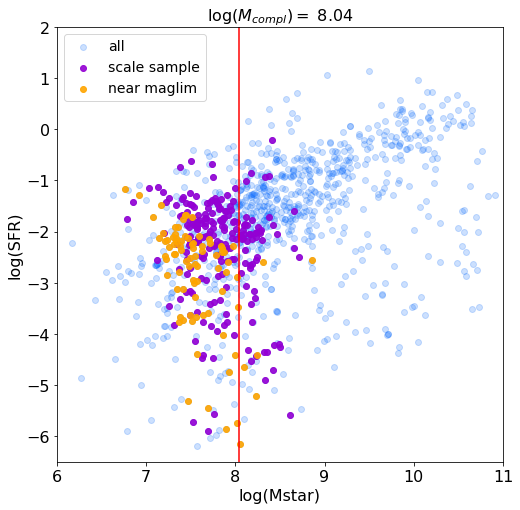

In [27]:
plt.figure(figsize=(8,8))
flag = massflag & velflag & qualflag
plt.scatter(v.magphys['logMstar'][flag],v.magphys['logSFR'][flag], alpha=0.2,color='xkcd:bright blue',label='all')
#plt.scatter(v.magphys['logMstar-med'][flag],v.magphys['logSFR-med'][flag], alpha=0.2,color='xkcd:bright blue',label='all')

#galaxies just brighter than limit
flag = massflag & nearlimflag & velflag & qualflag
plt.scatter(v.magphys['logMstar'][flag],v.magphys['logSFR'][flag], alpha=0.9,color='darkviolet',label='scale sample')
#plt.scatter(v.magphys['logMstar-med'][flag],v.magphys['logSFR-med'][flag], alpha=0.9,color='darkviolet',label='scale sample')

#galaxies at limit
flag = massflag & limflag & velflag & qualflag
plt.scatter(v.magphys['logMstar'][flag],v.magphys['logSFR'][flag], alpha=0.9,color='orange',label='near maglim')
#plt.scatter(v.magphys['logMstar-med'][flag],v.magphys['logSFR-med'][flag], alpha=0.9,color='orange',label='near maglim')

plt.xlabel('log(Mstar)',fontsize=16)
plt.ylabel('log(SFR)',fontsize=16)
#plt.xlabel('log(Mstar-med)',fontsize=16)
#plt.ylabel('log(SFR-med)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(6,11)
plt.ylim(-6.5,2)
#cb = plt.colorbar()
#cb.set_label(r'$m_r$ LS DR9',fontsize=16)
plt.axvline(x=masslim,color='red')
plt.legend(fontsize=14)

massstr = '%s' % float('%.3g' % masslim)
plt.title(r'log($M_{compl}) =$ '+massstr,fontsize=16)


Find galaxies around magnitude limit but with very high masses

In [28]:
#galaxies at limit
pflag = limflag & (v.magphys['logMstar']>9.2) & velflag
print(v.main['RA'][pflag])
print(v.main['DEC'][pflag])


 RA
---
DEC
---


## Now perform for SF galaxies only.  ##

In [38]:
lsSFRlim = -11.
xmin = 5.
xmax = 12.
sfrmin = xmin + lsSFRlim
sfrmax = xmax + lsSFRlim

#select SF galaxies
lsSFR = v.magphys['logSFR'] - v.magphys['logMstar']
sfgalflag = lsSFR>lsSFRlim

flag = nearlimflag & massflag & velflag & sfgalflag
#compute scaling of sources to get to magnitude limit
fluxscale = 10**(0.4 *(magdiff))

#scale stellar masses to magnitude limit
lmstar_sc = v.magphys['logMstar'][flag] + np.log10(fluxscale[flag])

print(np.median(fluxscale[flag]))
#print(fluxscale[flag])
#sort catalog 
sortind = np.argsort(lmstar_sc)
print(len(lmstar_sc))
#find 95% index
masslim = lmstar_sc[sortind[int(0.95 * len(sortind))]]
print(masslim)

0.44220045
173
7.938176700809716


Text(7.1, -4.3, 'log(sSFR) =-11.0')

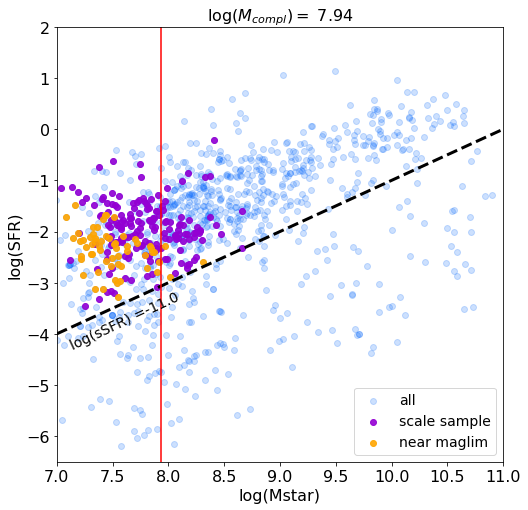

In [39]:
plt.figure(figsize=(8,8))
flag = massflag & velflag
plt.scatter(v.magphys['logMstar'][flag],v.magphys['logSFR'][flag], alpha=0.2,color='xkcd:bright blue',label='all')

#galaxies just brighter than limit
flag = massflag & nearlimflag & velflag & sfgalflag
plt.scatter(v.magphys['logMstar'][flag],v.magphys['logSFR'][flag], alpha=0.9,color='darkviolet',label='scale sample')

#galaxies at limit
flag = massflag & limflag & velflag & sfgalflag
plt.scatter(v.magphys['logMstar'][flag],v.magphys['logSFR'][flag], alpha=0.9,color='orange',label='near maglim')


plt.plot([xmin,xmax],[sfrmin,sfrmax],linestyle='--',color='black',linewidth=3)

#plt.scatter(v.magphys['logMstar'][flag&sfgalflag],v.magphys['logSFR'][flag&sfgalflag], alpha=0.2,color='xkcd:red')

plt.xlabel('log(Mstar)',fontsize=16)
plt.ylabel('log(SFR)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
#cb = plt.colorbar()
#cb.set_label(r'$m_r$ LS DR9',fontsize=16)
plt.axvline(x=masslim,color='red')
massstr = '%s' % float('%.3g' % masslim)
plt.title(r'log($M_{compl}) =$ '+massstr,fontsize=16)
plt.legend(fontsize=14)
plt.xlim(7,11)
plt.ylim(-6.5,2)

lsSFRlimstr = '%s' % float('%.2g' % lsSFRlim)
plt.text(7.1,-4.3,'log(sSFR) ='+lsSFRlimstr,rotation=25,fontsize=14)


## Look for surface brightness selection ##

1599


(14.0, 27.0)

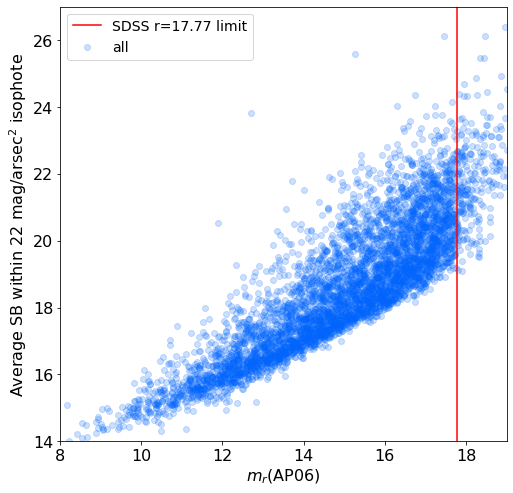

In [31]:
#ellipse area
majax = v.ephot['SMA_SB22']
minax = majax * v.ephot['BA_MOMENT']
area = np.sqrt(majax * minax)
sb22 = 22.5 - 2.5 * np.log10(v.ephot['FLUX_SB22_R']/area)
plt.figure(figsize=(8,8))

mag = 22.5 - 2.5 * np.log10(v.ephot['FLUX_AP06_R'])
flag = (v.ephot['FLUX_SB22_R']>0) & (v.ephot['FLUX_AP06_R']>0)
#flag = (v.ephot['FLUX_SB22_R']>0) & (v.ephot['COG_MTOT_R']>7)

#nosbflag = ~(v.ephot['FLUX_SB22_R']>0) & (v.ephot['COG_MTOT_R']>7)
nosbflag = ~(v.ephot['FLUX_SB22_R']>0) & (v.ephot['FLUX_AP06_R']>0)
print(sum(nosbflag))

plt.scatter(mag[flag], sb22[flag],alpha=0.2,color='xkcd:bright blue',label='all')

plt.xlabel(r'$m_r$(AP06)',fontsize=16)
plt.ylabel(r'Average SB within 22 mag/arsec$^2$ isophote',fontsize=16)
plt.axvline(x=17.77,color='red',label='SDSS r=17.77 limit')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=14)
plt.xlim(8,19)
plt.ylim(14,27)
